In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
netflix_data=pd.read_csv('netflix_content_2023.csv')

In [5]:
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [6]:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(',', '', regex=True).astype(float)

netflix_data[['Title', 'Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


In [30]:
# aggregate viewership hours by content type
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()
content_type_viewership


Content Type
Movie    5.063780e+10
Show     1.077641e+11
Name: Hours Viewed, dtype: float64

In [8]:
content_type_viewership

Content Type
Movie    5.063780e+10
Show     1.077641e+11
Name: Hours Viewed, dtype: float64

In [9]:
# Converting grouped data to a DataFrame for Seaborn
content_type_df = content_type_viewership.reset_index()

In [10]:
content_type_df

,Content Type,Hours Viewed
0,Movie,5.063780e+10
1,Show,1.077641e+11


In [39]:
# aggregate viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)
language_viewership

Language Indicator
English        1.244417e+11
Korean         1.537840e+10
Non-English    1.043910e+10
Japanese       7.102000e+09
Hindi          9.261000e+08
Russian        1.146000e+08
Name: Hours Viewed, dtype: float64

C:\Users\Amulya\AppData\Local\Temp\ipykernel_17416\3967355523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


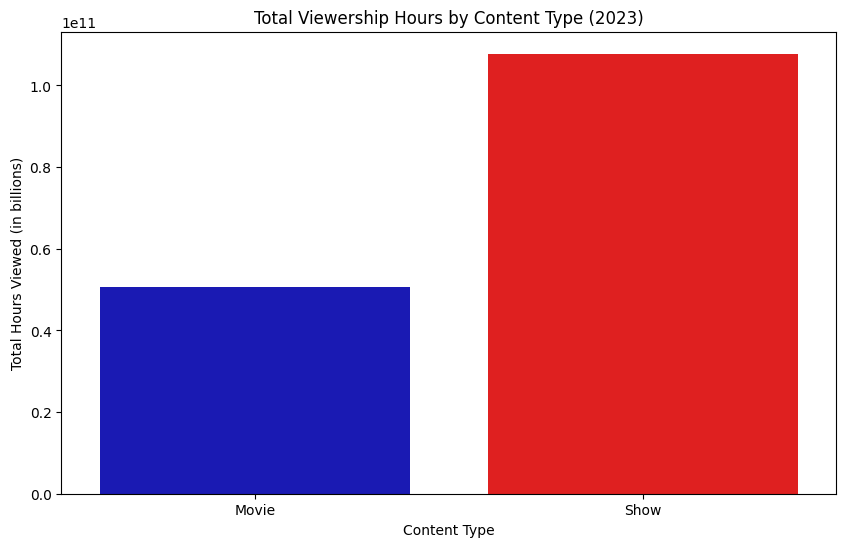

In [11]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Content Type',
    y='Hours Viewed',
    data=content_type_df,
    palette=['mediumblue', 'red']
)

# Adding titles and labels
plt.title('Total Viewership Hours by Content Type (2023)')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed (in billions)')

# Display the plot
plt.show()


In [41]:
# Convert Series to DataFrame
language_viewership_df = language_viewership.reset_index()
language_viewership_df.columns = ['Language Indicator', 'Hours Viewed']


C:\Users\Amulya\AppData\Local\Temp\ipykernel_17416\3480554092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


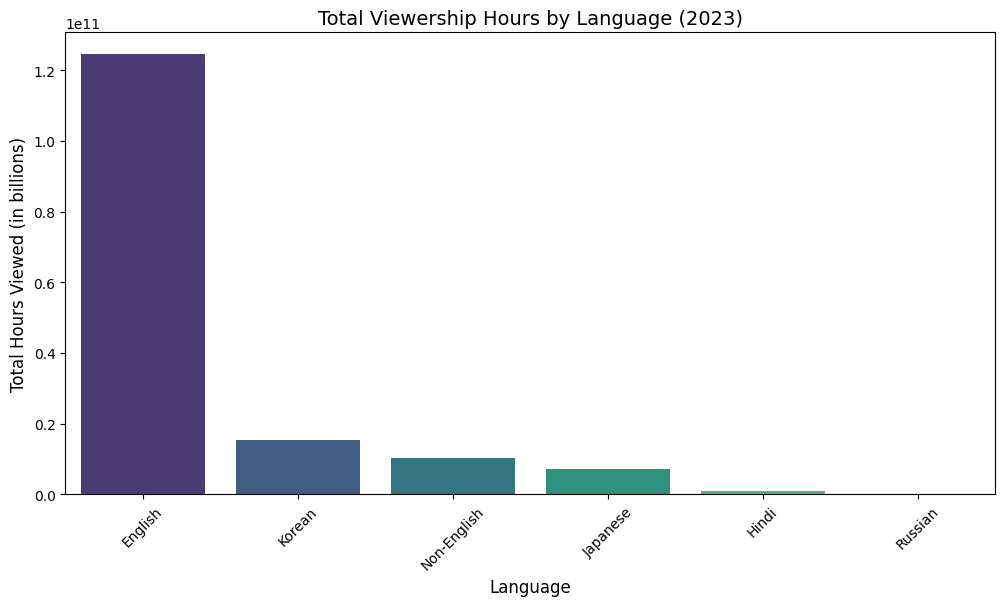

In [42]:

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Language Indicator', 
    y='Hours Viewed', 
    data=language_viewership_df, 
    palette='viridis'
)
plt.title('Total Viewership Hours by Language (2023)', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


In [12]:
# Calculate summary statistics for key numeric columns
summary_stats = netflix_data.describe()
print(summary_stats)


       Hours Viewed
count  2.481200e+04
mean   6.384084e+06
std    2.067086e+07
min    1.000000e+05
25%    3.000000e+05
50%    1.100000e+06
75%    4.700000e+06
max    8.121000e+08


In [13]:
# Identify potential outliers in viewership
q1 = netflix_data['Hours Viewed'].quantile(0.25)
q3 = netflix_data['Hours Viewed'].quantile(0.75)
iqr = q3 - q1
outliers = netflix_data[(netflix_data['Hours Viewed'] < (q1 - 1.5 * iqr)) | 
                        (netflix_data['Hours Viewed'] > (q3 + 1.5 * iqr))]
print(f"Outliers:\n{outliers}")


Outliers:
                                     Title Available Globally? Release Date  \
0                The Night Agent: Season 1                 Yes   2023-03-23   
1                Ginny & Georgia: Season 2                 Yes   2023-01-05   
2       The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                      Wednesday: Season 1                 Yes   2022-11-23   
4      Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   
...                                    ...                 ...          ...   
22464                Betty en NY: Season 1                  No          NaN   
22465      Rebelde Way (2002): Temporada 2                  No          NaN   
23291    As Aventuras de Poliana: Season 1                  No          NaN   
23292    Cúmplices de um Resgate: Season 1                  No          NaN   
23293          Pedro el escamoso: Season 1                  No          NaN   

       Hours Viewed Language Indicator Co

In [15]:
netflix_data['Release Date'].dtype

dtype('O')

In [20]:
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])


In [21]:
netflix_data['Release Year'] = netflix_data['Release Date'].dt.year

In [26]:
trends_over_time = netflix_data.groupby('Release Year')['Hours Viewed'].sum().reset_index()
print(trends_over_time)

    Release Year  Hours Viewed
0         2010.0  1.255000e+08
1         2011.0  1.555000e+08
2         2012.0  6.300000e+06
3         2013.0  2.606000e+08
4         2014.0  5.079000e+08
5         2015.0  1.082200e+09
6         2016.0  2.206800e+09
7         2017.0  3.998600e+09
8         2018.0  4.621800e+09
9         2019.0  6.410800e+09
10        2020.0  8.209700e+09
11        2021.0  1.030600e+10
12        2022.0  1.849040e+10
13        2023.0  3.444590e+10


In [46]:
# plt.figure(figsize=(10, 5))
# sns.lineplot(x='Release Year', y='Hours Viewed', data=trends_over_time, marker='o', color='blue')
# plt.title('Total Viewership Hours Over Time', fontsize=14)
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


In [34]:
numeric_data = netflix_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()


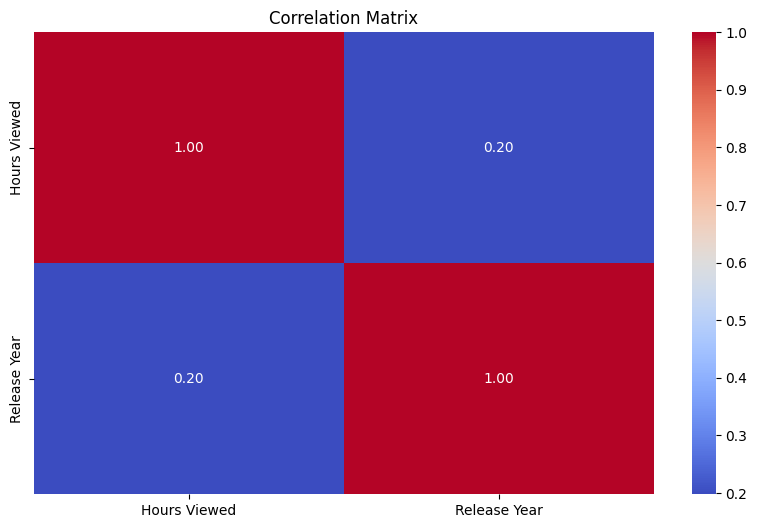

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [43]:
# Convert the "Release Date" to datetime and extract month
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month


In [44]:

# Aggregate viewership hours by release month
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum().reset_index()

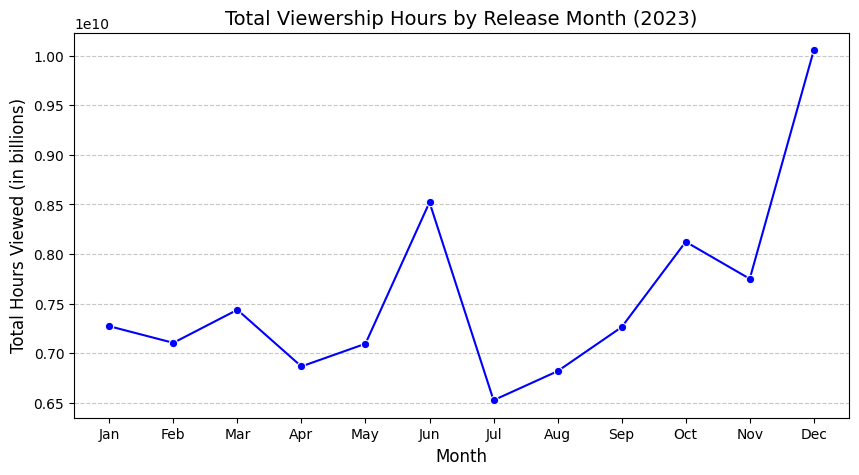

In [45]:


# Create a line plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Release Month', y='Hours Viewed', data=monthly_viewership, marker='o', color='blue')
plt.title('Total Viewership Hours by Release Month (2023)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [47]:
# Define seasons based on release months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)


In [48]:

# Aggregate viewership hours by season
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall']).reset_index()


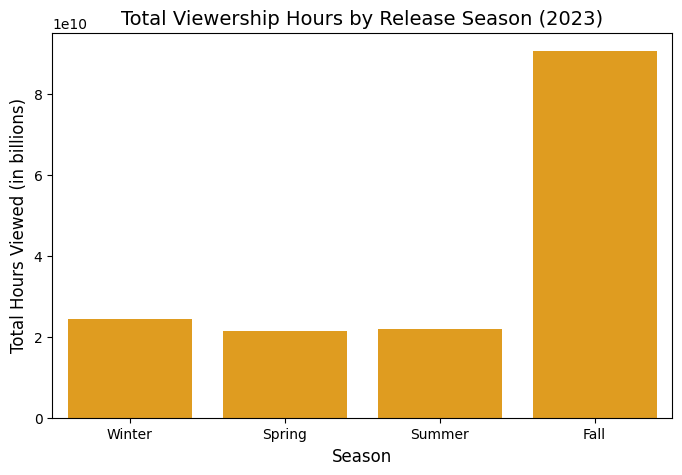

In [54]:
# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Release Season', y='Hours Viewed', data=seasonal_viewership, color='orange')
plt.title('Total Viewership Hours by Release Season (2023)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [57]:
# Aggregate viewership hours by content type and release month
monthly_viewership_by_type = netflix_data.pivot_table(
    index='Release Month',
    columns='Content Type',
    values='Hours Viewed',
    aggfunc='sum'
)

In [60]:
print(monthly_viewership_by_type.index)


Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], dtype='float64', name='Release Month')


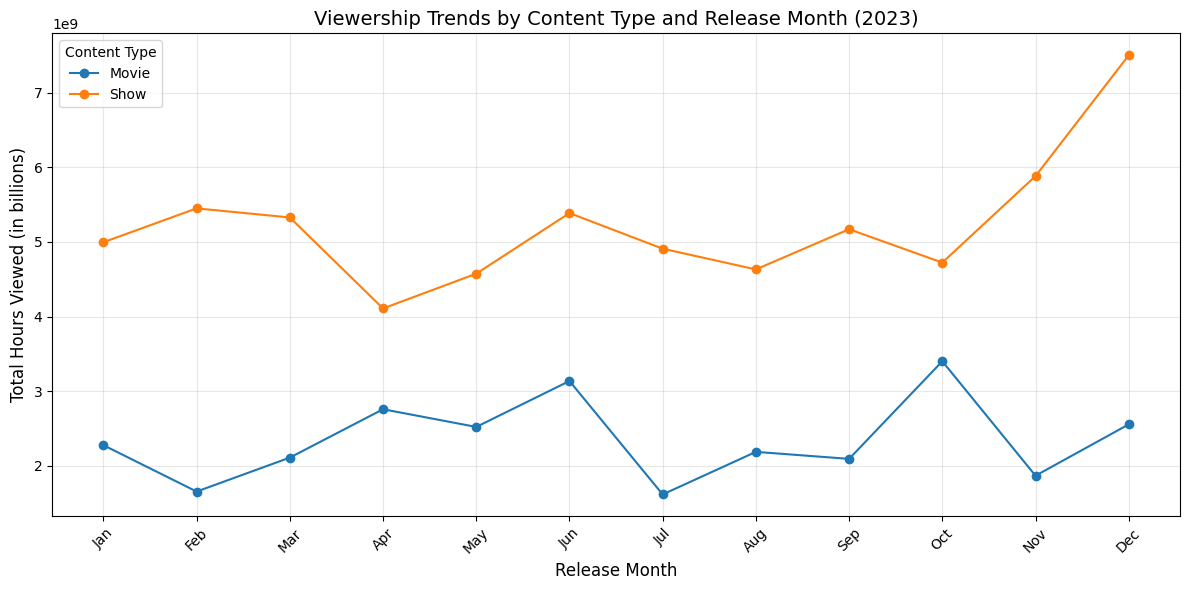

In [63]:

# Plot viewership trends
plt.figure(figsize=(12, 6))
for content_type in monthly_viewership_by_type.columns:
    plt.plot(
        monthly_viewership_by_type.index, 
        monthly_viewership_by_type[content_type], 
        marker='o', 
        label=content_type
    )

# Customize the plot
plt.title('Viewership Trends by Content Type and Release Month (2023)', fontsize=14)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Content Type', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [65]:
# Compute the monthly releases and viewership
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()


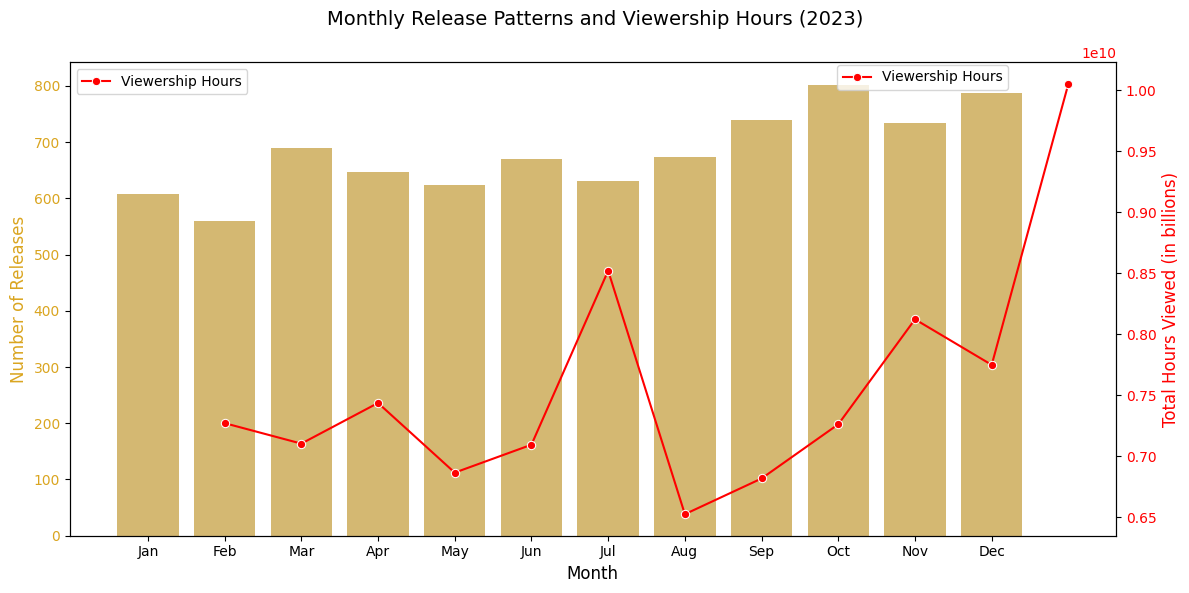

In [66]:

# Prepare the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the number of releases
sns.barplot(
    x=monthly_releases.index,
    y=monthly_releases.values,
    color='goldenrod',
    alpha=0.7,
    ax=ax1
)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of Releases', fontsize=12, color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')
ax1.set_xticks(range(12))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)

# Line plot for viewership hours
ax2 = ax1.twinx()
sns.lineplot(
    x=monthly_viewership.index,
    y=monthly_viewership.values,
    color='red',
    marker='o',
    label='Viewership Hours',
    ax=ax2
)
ax2.set_ylabel('Total Hours Viewed (in billions)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding a title and legend
fig.suptitle('Monthly Release Patterns and Viewership Hours (2023)', fontsize=14)
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.9))

# Layout adjustments
plt.tight_layout()
plt.show()


In [67]:
# Extract day names from the release dates
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()


In [68]:
# Compute the number of releases and viewership hours by day of the week
weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

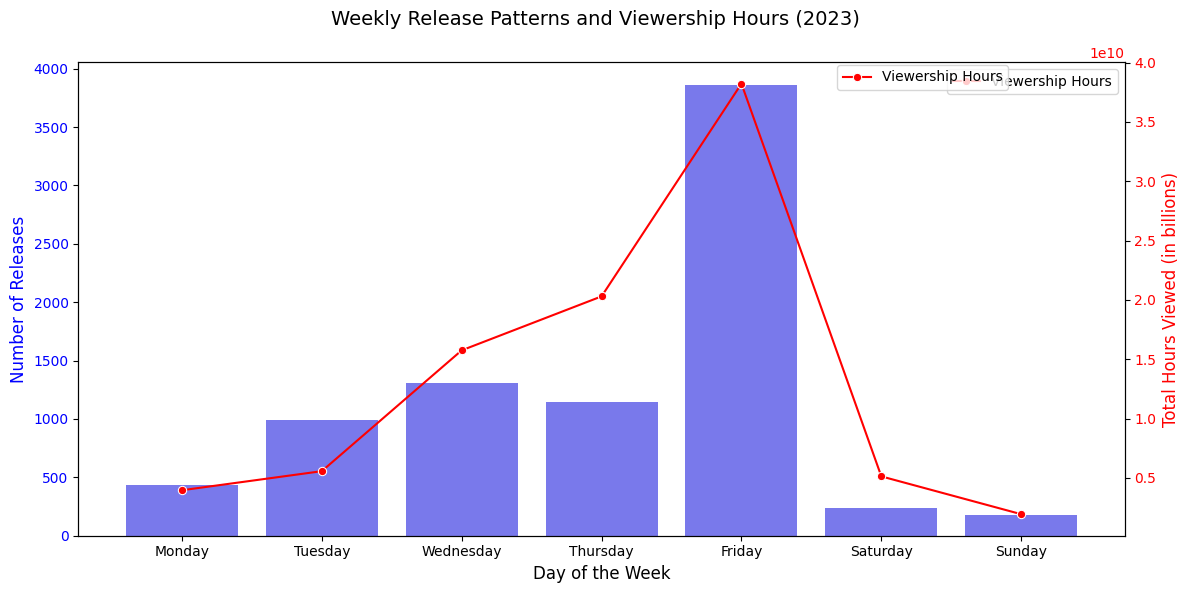

In [69]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for the number of releases
sns.barplot(
    x=weekday_releases.index,
    y=weekday_releases.values,
    color='blue',
    alpha=0.6,
    ax=ax1
)
ax1.set_xlabel('Day of the Week', fontsize=12)
ax1.set_ylabel('Number of Releases', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for viewership hours
ax2 = ax1.twinx()
sns.lineplot(
    x=weekday_viewership.index,
    y=weekday_viewership.values,
    color='red',
    marker='o',
    label='Viewership Hours',
    ax=ax2
)
ax2.set_ylabel('Total Hours Viewed (in billions)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
fig.suptitle('Weekly Release Patterns and Viewership Hours (2023)', fontsize=14)
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.9))

# Layout adjustments
plt.tight_layout()
plt.show()

In [70]:
# Define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # New Year's Day
    '2023-02-14',  # Valentine's Day
    '2023-07-04',  # Independence Day (US)
    '2023-10-31',  # Halloween
    '2023-12-25'   # Christmas Day
]

In [71]:
# Convert important dates to datetime
important_dates = pd.to_datetime(important_dates)


In [72]:
# Identify content releases within a 3-day window of the significant holidays
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

In [73]:
# Aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

In [74]:
# Extract relevant columns for display
print(holiday_releases[['Title', 'Release Date', 'Hours Viewed']])

                                                   Title Release Date  \
2                     The Glory: Season 1 // 더 글로리: 시즌 1   2022-12-30   
6                             La Reina del Sur: Season 3   2022-12-30   
11                          Kaleidoscope: Limited Series   2023-01-01   
29                               Perfect Match: Season 1   2023-02-14   
124    Lady Voyeur: Limited Series // Olhar Indiscret...   2022-12-31   
...                                                  ...          ...   
22324                      The Romantics: Limited Series   2023-02-14   
22327            Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5   2023-02-16   
22966  The Lying Life of Adults: Limited Series // La...   2023-01-04   
22985  Community Squad: Season 1 // División Palermo:...   2023-02-17   
24187                       Live to Lead: Limited Series   2022-12-31   

       Hours Viewed  
2       622800000.0  
6       429600000.0  
11      252500000.0  
29      176800000.0  
124      8600

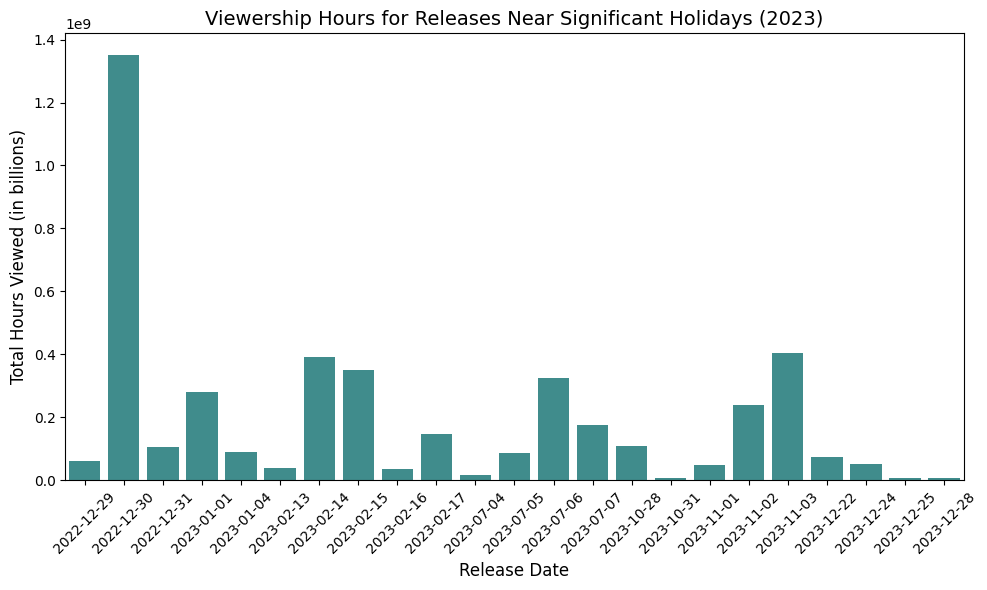

In [75]:
# Visualize the viewership hours near significant holidays
plt.figure(figsize=(10, 6))
sns.barplot(
    x=holiday_viewership.index.strftime('%Y-%m-%d'),
    y=holiday_viewership.values,
    color='teal',
    alpha=0.8
)
plt.title('Viewership Hours for Releases Near Significant Holidays (2023)', fontsize=14)
plt.xlabel('Release Date', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Hours Viewed vs. Number of Releases
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=netflix_data['Hours Viewed'], 
    y=netflix_data['Number of Releases'], 
    hue=netflix_data['Content Type'],  # Optional: Add a hue for categories like Content Type
    palette='viridis', 
    alpha=0.7
)
plt.title('Scatter Plot: Hours Viewed vs Number of Releases', fontsize=14)
plt.xlabel('Total Hours Viewed (in billions)', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.legend(title='Content Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


KeyError: 'Number of Releases'

<Figure size 800x600 with 0 Axes>

In [77]:
print(netflix_data.columns)


Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Language Indicator', 'Content Type', 'Release Year', 'Release Month',
       'Release Season', 'Release Day'],
      dtype='object')


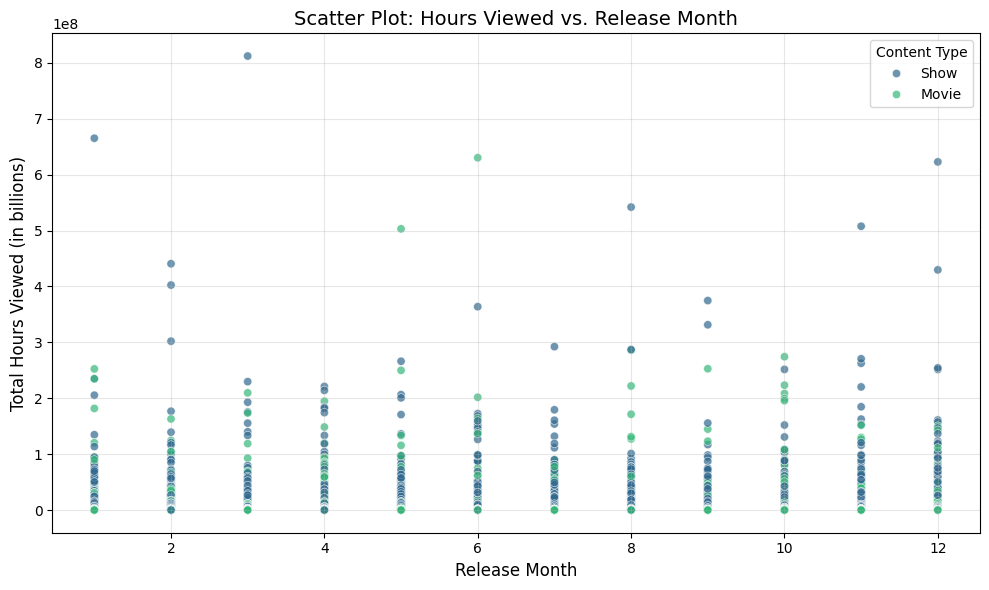

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=netflix_data['Release Month'], 
    y=netflix_data['Hours Viewed'], 
    hue=netflix_data['Content Type'],  # Optional for categorical grouping
    palette='viridis',
    alpha=0.7
)
plt.title('Scatter Plot: Hours Viewed vs. Release Month', fontsize=14)
plt.xlabel('Release Month', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.legend(title='Content Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [79]:
# Count the number of releases per month
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()

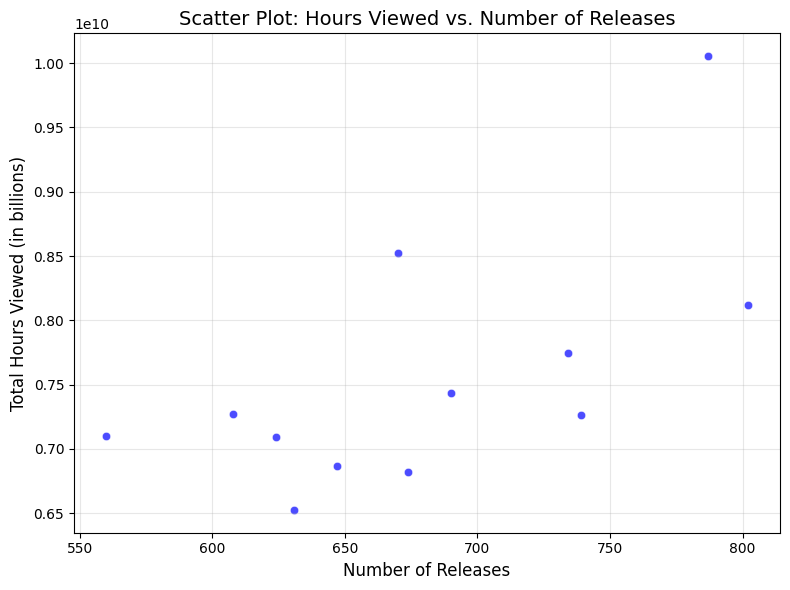

In [80]:


# Scatter Plot: Hours Viewed vs. Number of Releases
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=monthly_releases.values, 
    y=netflix_data.groupby('Release Month')['Hours Viewed'].sum().values,
    color='blue',
    alpha=0.7
)
plt.title('Scatter Plot: Hours Viewed vs. Number of Releases', fontsize=14)
plt.xlabel('Number of Releases', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [82]:
# Pivot table for heatmap
heatmap_data = netflix_data.pivot_table(
    index='Release Month', 
    columns='Content Type', 
    values='Hours Viewed', 
    aggfunc='sum'
)


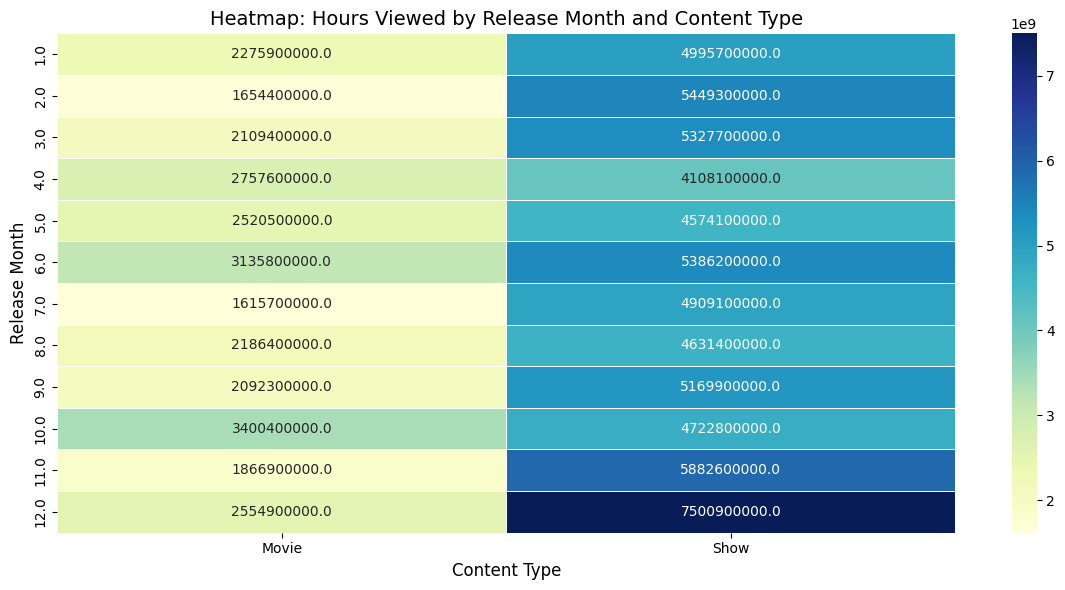

In [83]:

# Heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.1f', 
    cmap='YlGnBu', 
    linewidths=0.5
)
plt.title('Heatmap: Hours Viewed by Release Month and Content Type', fontsize=14)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Release Month', fontsize=12)
plt.tight_layout()
plt.show()


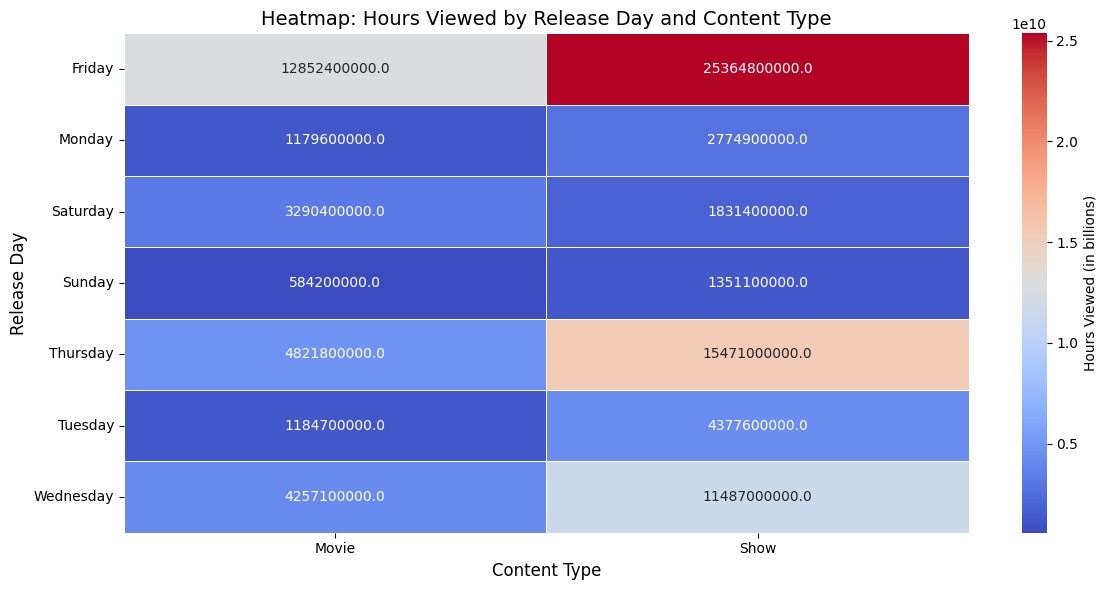

In [85]:
# Pivot table for heatmap
heatmap_data = netflix_data.pivot_table(
    index='Release Day',
    columns='Content Type', 
    values='Hours Viewed',
    aggfunc='sum'
)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Hours Viewed (in billions)'}
)
plt.title('Heatmap: Hours Viewed by Release Day and Content Type', fontsize=14)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Release Day', fontsize=12)
plt.tight_layout()
plt.show()


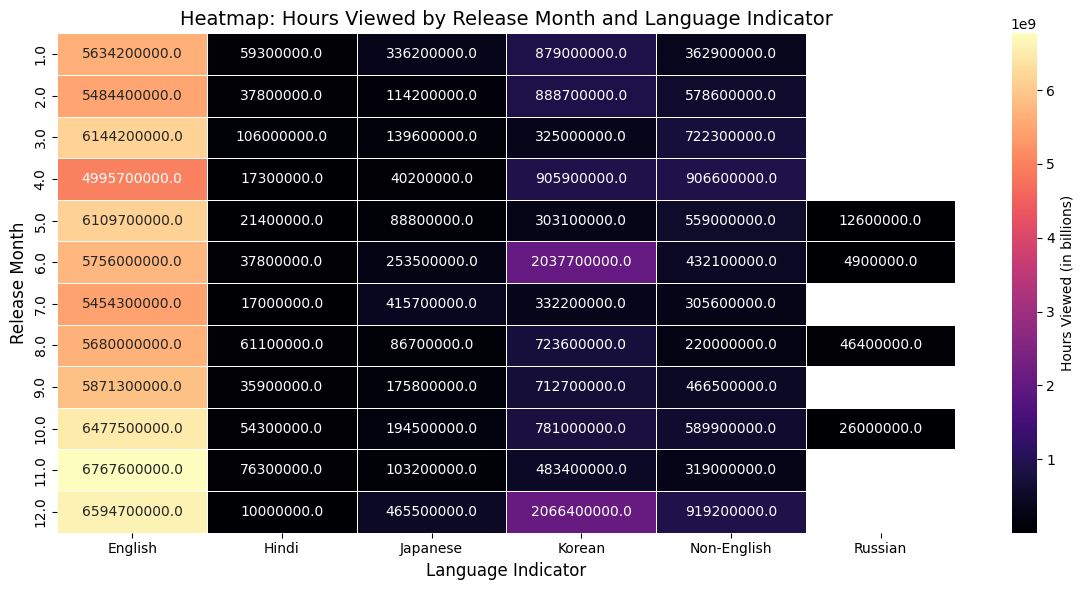

In [86]:
# Pivot table for heatmap
heatmap_data = netflix_data.pivot_table(
    index='Release Month',
    columns='Language Indicator',
    values='Hours Viewed',
    aggfunc='sum'
)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='magma',
    linewidths=0.5,
    cbar_kws={'label': 'Hours Viewed (in billions)'}
)
plt.title('Heatmap: Hours Viewed by Release Month and Language Indicator', fontsize=14)
plt.xlabel('Language Indicator', fontsize=12)
plt.ylabel('Release Month', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\Amulya\AppData\Local\Temp\ipykernel_17416\672371972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


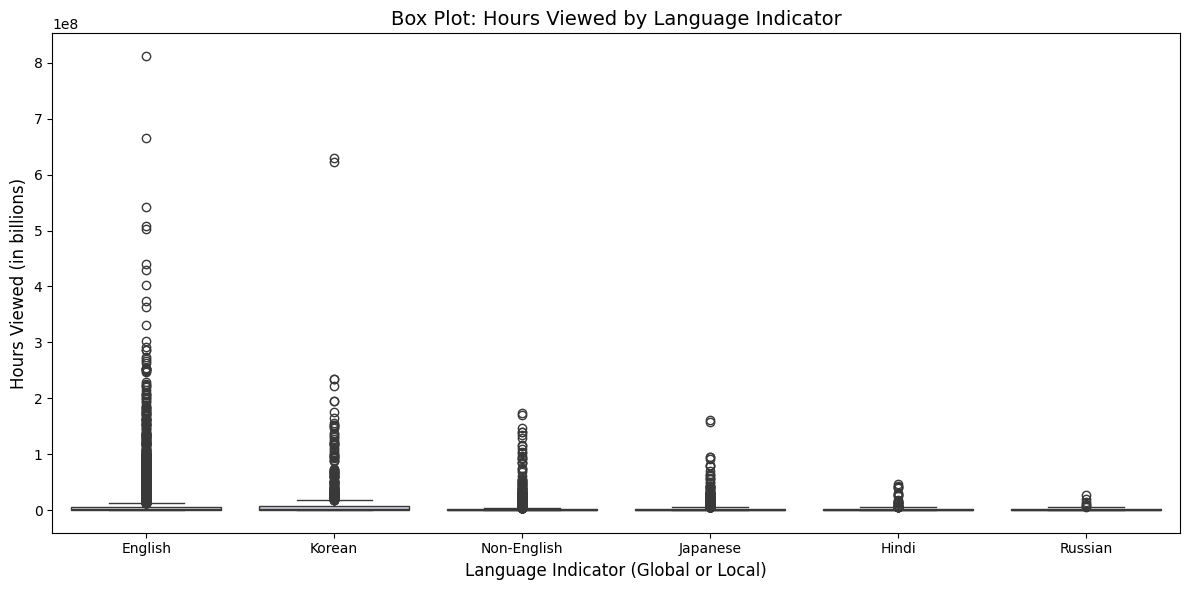

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Language Indicator',
    y='Hours Viewed',
    data=netflix_data,
    palette='Purples'
)
plt.title('Box Plot: Hours Viewed by Language Indicator', fontsize=14)
plt.xlabel('Language Indicator (Global or Local)', fontsize=12)
plt.ylabel('Hours Viewed (in billions)', fontsize=12)
plt.tight_layout()
plt.show()
